In [93]:
#part-1:wordCloud visualization(PERFECT)
import pandas as pd

In [94]:
#Read the Dataset file 
dff=pd.read_csv("Corona dataset/2019_nCoV_data.csv")
dff.head(5)

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1,0,0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14,0,0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6,0,0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1,0,0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0,0,0


In [95]:
#To get insight information of Dataset
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 8 columns):
Sno               1719 non-null int64
Date              1719 non-null object
Province/State    1257 non-null object
Country           1719 non-null object
Last Update       1719 non-null object
Confirmed         1719 non-null int64
Deaths            1719 non-null int64
Recovered         1719 non-null int64
dtypes: int64(4), object(4)
memory usage: 107.6+ KB


In [96]:
df=pd.read_csv("Corona dataset/2019_nCoV_data.csv",usecols=['Country','Confirmed','Deaths','Recovered'])
df.head(5)

,Country,Confirmed,Deaths,Recovered
0,China,1,0,0
1,China,14,0,0
2,China,6,0,0
3,China,1,0,0
4,China,0,0,0


In [97]:
df.tail(5)

,Country,Confirmed,Deaths,Recovered
1714,US,1,0,0
1715,US,1,0,0
1716,US,1,0,0
1717,US,1,0,1
1718,US,1,0,0


In [98]:
#Group by Country name to get the sum of affetced,death,recovered people in each country
before_drop=df.groupby('Country').sum()
before_drop

,Confirmed,Deaths,Recovered
Country,,,
Australia,284,0,70
Belgium,14,0,1
Brazil,0,0,0
Cambodia,22,0,6
Canada,116,0,6
China,549,0,0
Egypt,4,0,0
Finland,20,0,7
France,186,3,18


In [99]:
#In the dataset some of the countries with zero affected people are present
#Drop such countries

In [100]:
after_drop=pd.DataFrame(before_drop.drop(before_drop[before_drop['Confirmed']==0].index))
after_drop

,Confirmed,Deaths,Recovered
Country,,,
Australia,284,0,70
Belgium,14,0,1
Cambodia,22,0,6
Canada,116,0,6
China,549,0,0
Egypt,4,0,0
Finland,20,0,7
France,186,3,18
Germany,252,0,5


In [101]:
dd=after_drop.to_dict("dic")

In [102]:
df_dic=dd['Confirmed']

In [103]:
#Showing  affected countries in the form of wordcloud image
from wordcloud import WordCloud

In [104]:
word_cloud=WordCloud(background_color="#101010",width=900,height=200)

In [105]:
word_cloud.generate_from_frequencies(df_dic)

In [106]:
word_cloud.to_file("Corona_cloud.png")

In [107]:
from IPython.display import Image

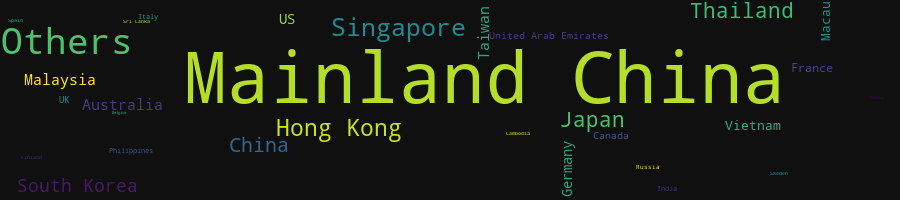

In [108]:
Image("Corona_cloud.png")
#Highlighted countries indicates highly affected countries from corona virus

In [109]:
dic_rev=dict(sorted(df_dic.items(), key=lambda x: x[1], reverse=True))
#del dic_rev['Others']

In [110]:
dic_rev

{'Mainland China': 255141,
 'Others': 2161,
 'Singapore': 797,
 'Hong Kong': 681,
 'Japan': 591,
 'Thailand': 581,
 'China': 549,
 'South Korea': 444,
 'Taiwan': 320,
 'Malaysia': 303,
 'Australia': 284,
 'Germany': 252,
 'US': 250,
 'Vietnam': 225,
 'Macau': 209,
 'France': 186,
 'United Arab Emirates': 126,
 'Canada': 116,
 'UK': 93,
 'India': 50,
 'Italy': 49,
 'Philippines': 47,
 'Russia': 36,
 'Spain': 27,
 'Nepal': 24,
 'Cambodia': 22,
 'Sri Lanka': 22,
 'Finland': 20,
 'Sweden': 18,
 'Belgium': 14,
 'Egypt': 4}

In [111]:
import matplotlib.pyplot as plt

In [112]:
X=dic_rev.keys()
X=list(X)

In [113]:
Y=dic_rev.values()
Y=list(Y)

In [114]:
plt.figure(figsize=(200,100))

<Figure size 14400x7200 with 0 Axes>

<Figure size 14400x7200 with 0 Axes>

Text(0, 0.5, 'Affected no of people')

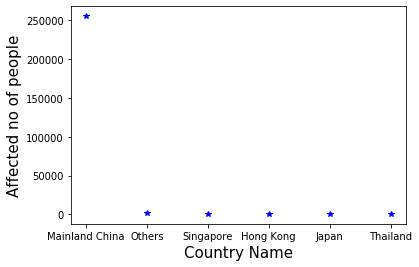

In [124]:
#plotting first five highly affected countries
plt.plot(X[:6],Y[:6],"b*")
plt.xlabel("Country Name",fontsize=15)
plt.ylabel("Affected no of people",fontsize=15)

Text(0, 0.5, 'Affected no of people')

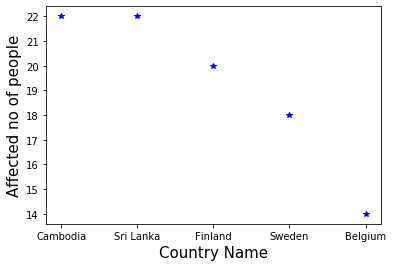

In [125]:
#plotting last five least affected countries
plt.plot(X[-6:-1],Y[-6:-1],"b*")
plt.xlabel("Country Name",fontsize=15)
plt.ylabel("Affected no of people",fontsize=15)

Text(0, 0.5, 'Affected no of people')

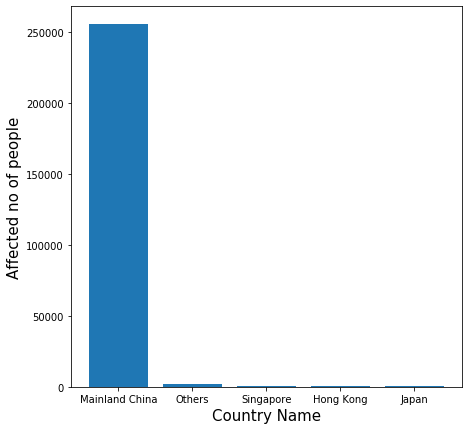

In [117]:
#plotting bar graph of first five highly affected countries
X1=X[:5]
Y1=Y[:5]
plt.figure(figsize=(7,7))
plt.bar(X1,Y1)
plt.xlabel("Country Name",fontsize=15)
plt.ylabel("Affected no of people",fontsize=15)

Text(0, 0.5, 'Affected no of people')

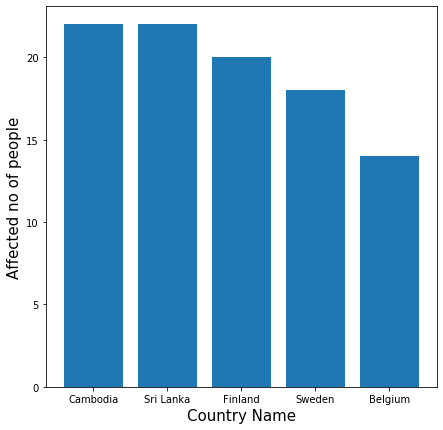

In [118]:
#plotting bar graph of last five least affected countries
X2=X[-6:-1]
Y2=Y[-6:-1]
plt.figure(figsize=(7,7))
plt.bar(X2,Y2)
plt.xlabel("Country Name",fontsize=15)
plt.ylabel("Affected no of people",fontsize=15)

In [119]:
cc=dd['Confirmed']
de=dd['Deaths']
aff_no=list(cc.values())
de_no=list(de.values())
total_affected=sum(aff_no)
total_death=sum(de_no)

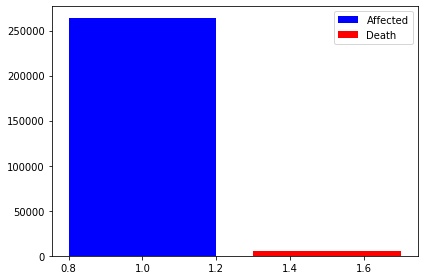

In [120]:
#plotting graph of how many affected and how many dead from the virus
fig,ax=plt.subplots()
bar_width=0.4
r1=plt.bar(1,total_affected,bar_width,color="b",label="Affected")
r2=plt.bar(1.5,total_death,bar_width,color="r",label="Death")
plt.legend()
plt.tight_layout()
plt.show()

In [121]:
cc=dd['Confirmed']
re=dd['Recovered']
aff_no=list(cc.values())
re_no=list(re.values())
total_affected=sum(aff_no)
total_recovered=sum(re_no)

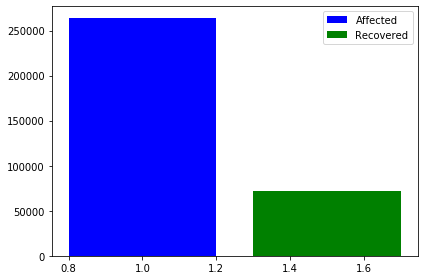

In [122]:
#plotting graph of how many affected and how many recovered from corona virus
fig,ax=plt.subplots()
bar_width=0.4
r1=plt.bar(1,total_affected,bar_width,color="b",label="Affected")
r2=plt.bar(1.5,total_recovered,bar_width,color="g",label="Recovered")
plt.legend()
plt.tight_layout()
plt.show()